In [1]:
%load_ext autoreload
%autoreload 2
from visualize_dataset_new import plot_proposals_gt
from dataset import KITTIBEV
import torch
from torch.utils.data import DataLoader, Dataset

/home/akshay/anaconda3/envs/pixor/lib/python3.5/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
valid_data_list_filename = "valid_filenames.txt"
lidar_folder_name = "/media/akshay/Data/KITTI/"

dataset = KITTIBEV(valid_data_list_filename=valid_data_list_filename, 
                   lidar_folder_name=lidar_folder_name)


Preloading Data


(800, 700, 36)
[[412.3999939   74.65000153 424.3999939   93.54999542]]
000000
(1, 4) (100, 4)


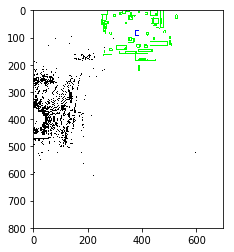

(800, 700, 36)
[[   343.            680.14996338    466.3999939     708.64996338]
 [   216.25          576.54998779    253.1499939     593.25      ]
 [   435.79998779    449.1000061     456.            467.70001221]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000001
(7, 4) (100, 4)


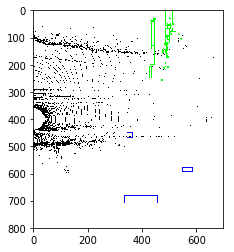

(800, 700, 36)
[[   389.25          124.3500061     430.75          140.05000305]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000003
(3, 4) (100, 4)


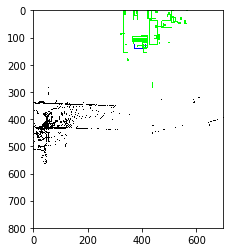

(800, 700, 36)
[[   222.8500061     375.1499939     262.95001221    390.05001831]
 [   224.05000305    504.79998779    258.1499939     518.59997559]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000004
(7, 4) (100, 4)


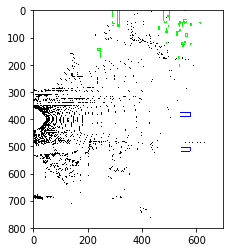

(800, 700, 36)
[[   311.75          220.84999084    318.25          239.55000305]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000005
(5, 4) (100, 4)


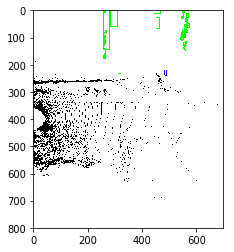

(800, 700, 36)
[[   354.70001221    474.79998779    390.8999939     489.59997559]
 [   352.29998779    308.95001221    395.5           325.6499939 ]
 [   255.20001221    189.69999695    294.            204.69999695]
 [   251.94999695    375.99996948    294.8500061     392.79998779]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000006
(6, 4) (100, 4)


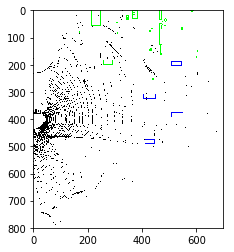

(800, 700, 36)
[[   377.1000061     242.05000305    409.1000061     258.1499939 ]
 [   307.20001221    468.49996948    344.20001221    482.5       ]
 [   332.6499939     597.90002441    373.1499939     612.5       ]
 [   263.95001221    332.29998779    283.45001221    349.5       ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000007
(6, 4) (100, 4)


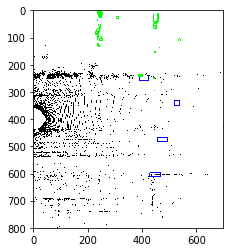

(800, 700, 36)
[[   356.8500061      28.80000114    389.1499939      44.79999924]
 [   369.8999939      70.75          406.70001221     86.45000458]
 [   422.70001221     54.54999924    453.5            68.44999695]
 [   392.3999939     137.05000305    429.            151.75      ]
 [   452.            323.49996948    492.79998779    340.5       ]
 [   472.45001221    191.65000916    497.1499939     207.54998779]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000008
(10, 4) (100, 4)


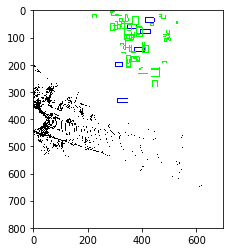

(800, 700, 36)
[[   391.            230.75          423.            246.84999084]
 [   384.1000061     656.5           420.70001221    670.89996338]
 [   361.25          675.44995117    394.95001221    689.54998779]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000009
(5, 4) (100, 4)


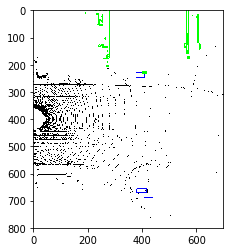

(800, 700, 36)
[[   427.54998779     44.14999771    461.04998779     59.85000229]
 [   356.3500061     110.84999847    395.8500061     125.15000153]
 [   477.8500061     225.30000305    488.75          244.8999939 ]
 [   442.29998779    157.44999695    474.70001221    172.54998779]
 [   448.20001221    213.25          489.20001221    227.75      ]
 [   377.25          228.70001221    415.1499939     244.09999084]
 [   389.6499939     283.25          423.1499939     298.1499939 ]
 [   456.95001221    277.6499939     500.6499939     292.94998169]
 [   427.6000061     420.29998779    462.3999939     436.69998169]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000010
(13, 4) (100, 4)


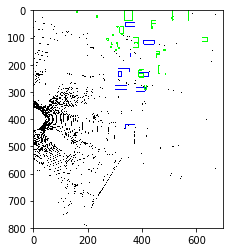

(800, 700, 36)
[[   445.3999939     114.70000458    455.79998779    133.69999695]
 [   449.70001221    124.94999695    458.70001221    143.6499939 ]
 [   331.3500061     257.09997559    369.6499939     275.69998169]
 [   417.25          331.8999939     426.75          349.70001221]
 [   330.29998779     33.79999924    367.29998779     48.79999924]
 [   318.75          151.80000305    322.8500061     167.19999695]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000011
(9, 4) (100, 4)


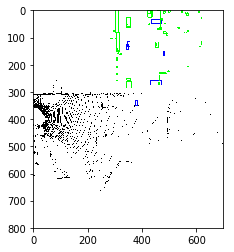

(800, 700, 36)
[[   351.04998779    194.05000305    385.75          208.54998779]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000013
(2, 4) (100, 4)


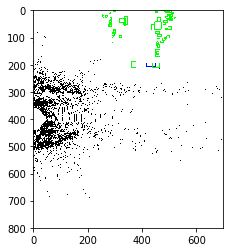

(800, 700, 36)
[[   403.75          590.89996338    447.6499939     605.29998779]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000014
(3, 4) (100, 4)


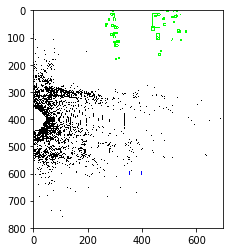

(800, 700, 36)
[[   351.79998779     33.15000153    393.20001221     48.85000229]
 [   443.8500061      66.84999847    451.1499939      84.94999695]
 [   420.29998779    232.75          428.8999939     250.04998779]
 [   428.25          233.15000916    437.75          251.25      ]
 [   377.04998779    224.09999084    387.1499939     241.90000916]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000015
(10, 4) (100, 4)


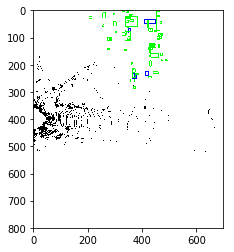

(800, 700, 36)
[[   475.3500061     463.49996948    518.84997559    479.70001221]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000017
(2, 4) (100, 4)


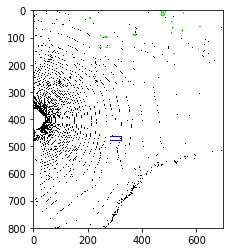

(800, 700, 36)
[[   341.20001221     41.59999847    395.3999939      67.59999847]
 [   409.8500061      89.8999939     446.95001221    104.5       ]
 [   402.1499939     343.54998779    446.25          363.25      ]
 [   341.95001221    588.            381.04998779    603.79998779]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000019
(6, 4) (100, 4)


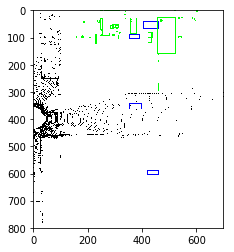

(800, 700, 36)
[[   418.04998779     23.45000076    436.95001221     39.34999847]
 [   350.79998779    125.79999542    388.6000061     140.19999695]
 [   353.3999939     167.1499939     396.20001221    184.8500061 ]
 [   480.70001221    199.44999695    537.29998779    226.55000305]
 [   432.1499939     252.45001221    471.45001221    266.94998169]
 [   364.            259.6499939     403.6000061     276.94998169]
 [   433.8500061     312.3999939     477.54998779    330.20001221]
 [   372.1499939     309.3999939     405.04998779    326.19998169]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000021
(10, 4) (100, 4)


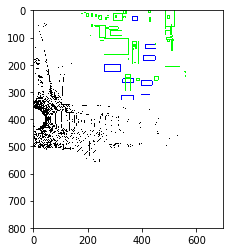

(800, 700, 36)
[[   188.5           310.1000061     229.8999939     324.29998779]
 [   161.55000305    308.5           202.6499939     323.69998169]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000022
(3, 4) (100, 4)


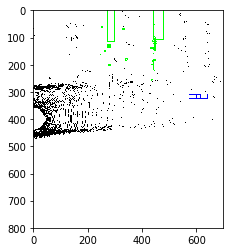

(800, 700, 36)
[[   342.5           678.64996338    465.8999939     707.14996338]
 [   215.84999084    542.44995117    252.75          559.15002441]
 [   435.70001221    438.30001831    455.8999939     456.8999939 ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000023
(6, 4) (100, 4)


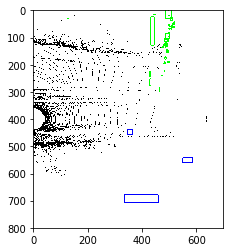

(800, 700, 36)
[[   346.1000061     355.69998169    384.5           371.69998169]
 [   304.95001221    373.95001221    339.45001221    387.8500061 ]
 [   260.40002441    513.04998779    298.            527.14996338]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]
 [ -9595.          -9995.          -9605.         -10005.        ]]
000024
(7, 4) (100, 4)


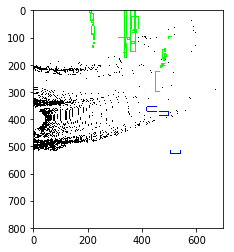

In [3]:
import numpy as np
dataloader = DataLoader(dataset, batch_size=1)
i = 0
for data in dataloader:
    # if i <= 10:
    #     i += 1 
    #     continue
    bev = data['bev']
    #labels = data['labels']
    gt_boxes = data['gt_boxes'].squeeze(0)
    proposals = data['proposals'].squeeze(0)
    #proposals = torch.cuda.FloatTensor(proposals)
    #gt_class_list = data['gt_class_list'].cuda()
    gt_boxes = gt_boxes.cpu().detach().numpy()
    proposals = proposals.cpu().detach().numpy()
    # proposals[:, 0] = 800 - proposals[:, 0]
    # proposals[:, 2] = 800 - proposals[:, 2]
    print(gt_boxes.shape, proposals.shape)
    plot_proposals_gt(gt_boxes.astype(np.int32), proposals.astype(np.int32), bev[0])
    i += 1

    if i >= 20:
        break